In [1]:
from spec_id import Gen_spec
from scipy.interpolate import interp1d, interp2d
import matplotlib.pyplot as plt
from glob import glob
import seaborn as sea
import numpy as np
import pandas as pd
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
# galDB = galDB.query('ids != 14713 and ids != 38126')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [4]:
spec1 = Gen_spec(galDB['gids'][61], galDB['hi_res_specz'][220],delayed=True,maxwv=11400)
spec2 = Gen_spec(galDB['gids'][61], galDB['hi_res_specz'][61],delayed=True,maxwv=11400)
spec3 = Gen_spec(galDB['gids'][61], galDB['hi_res_specz'][232],delayed=True,maxwv=11400)
spec4 = Gen_spec(galDB['gids'][61], galDB['hi_res_specz'][248],delayed=True,maxwv=11400)

spec1.Sim_spec(0.019,2.2,8.0)
spec2.Sim_spec(0.019,2.2,8.0)
spec3.Sim_spec(0.019,2.2,8.0)
spec4.Sim_spec(0.019,2.2,8.0)


../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../data/galaxy_flts/n21156_flt.detect.cat
../data/galaxy_flts/n21156_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/n21156_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/n21156_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/n21156_flt: save ../data/galaxy_flts/n21156_flt.detect_seg.fits, ../dat

/Users/vestrada/miniconda2/envs/astroconda/lib/python2.7/site-packages/grizli/model.py:496: RuntimeWarning: invalid value encountered in divide
  self.optimal_profile = m/m.sum(axis=0)


In [10]:
print SNR(spec1.gal_wv,spec1.gal_fl,spec1.gal_er*1.573)
print SNR(spec2.gal_wv,spec2.gal_fl,spec1.gal_er)
print SNR(spec3.gal_wv,spec3.gal_fl,spec1.gal_er)
print SNR(spec4.gal_wv,spec4.gal_fl,spec1.gal_er)


8.94158029546
14.0651058048
14.0651058048
14.0651058048


In [9]:
def SNR(wave,flux,error):
#     IDX = [U for U in range(len(wave)) if 8500 < wave[U] < 10500]
    IDX = [U for U in range(len(wave)) if 8000 < wave[U] < 15000]

    fl = np.trapz(flux[IDX],wave[IDX])
    er = np.trapz(error[IDX],wave[IDX])
    return fl/er

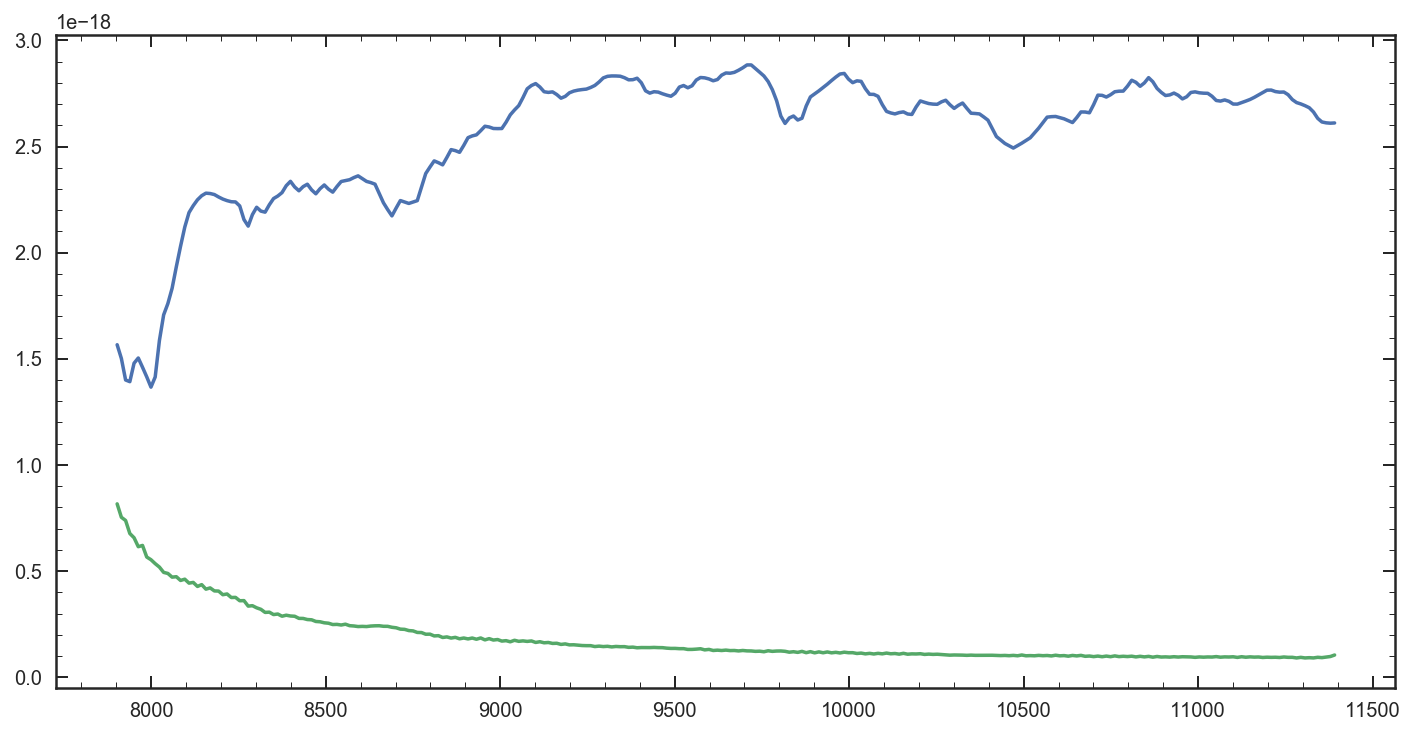

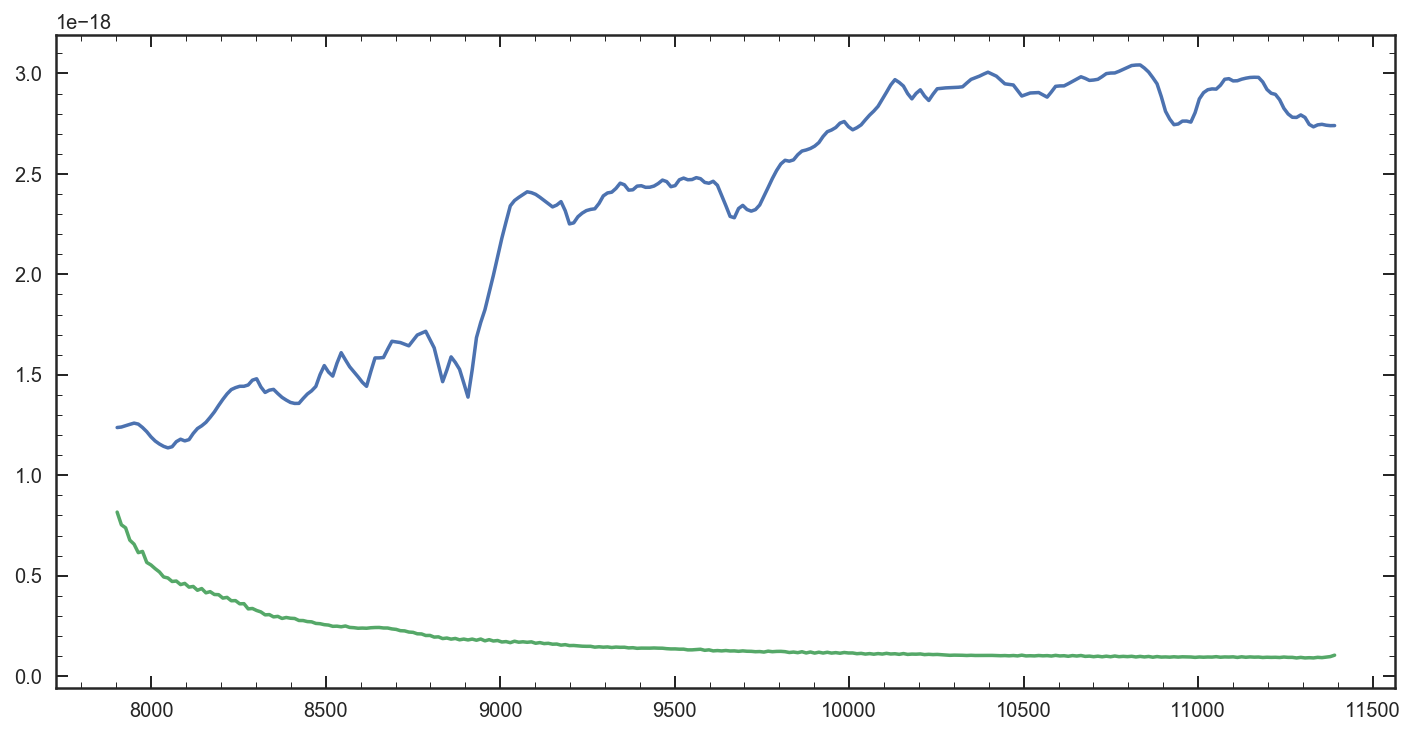

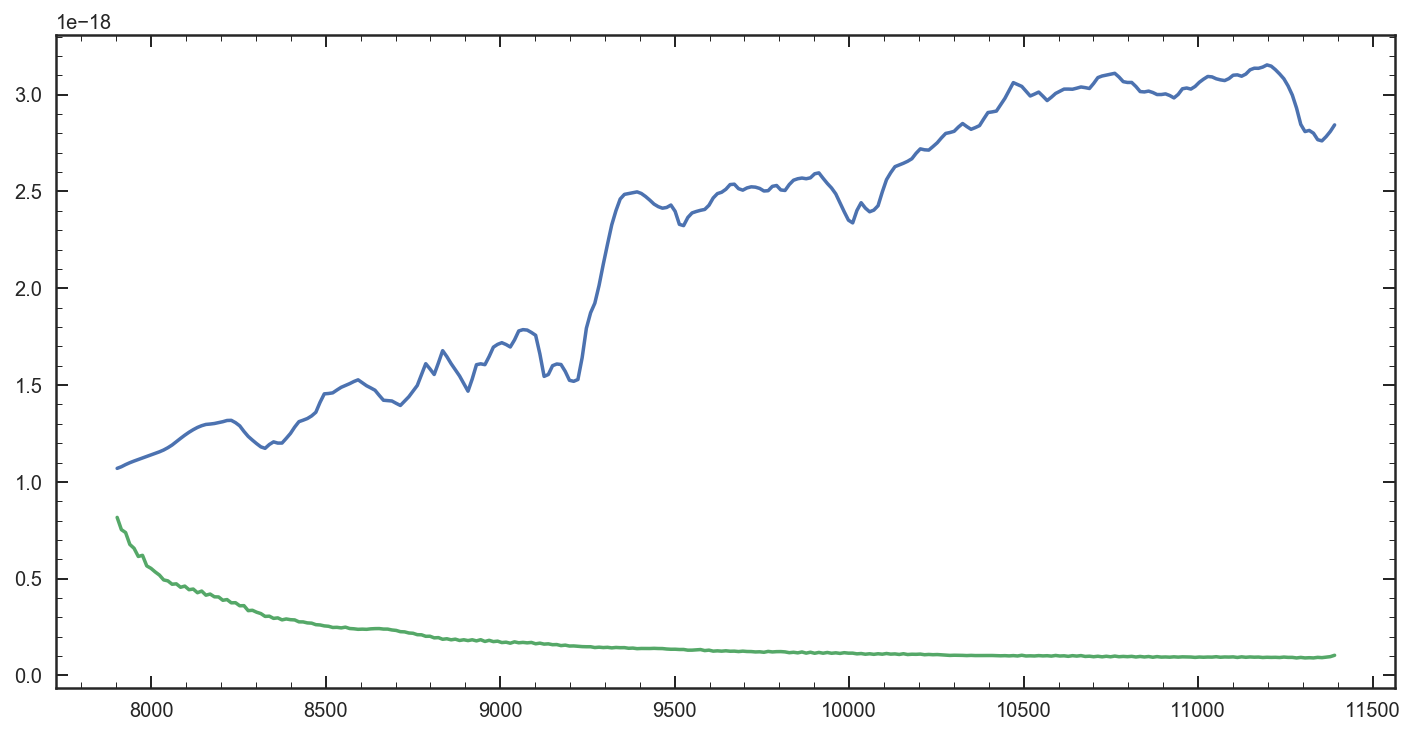

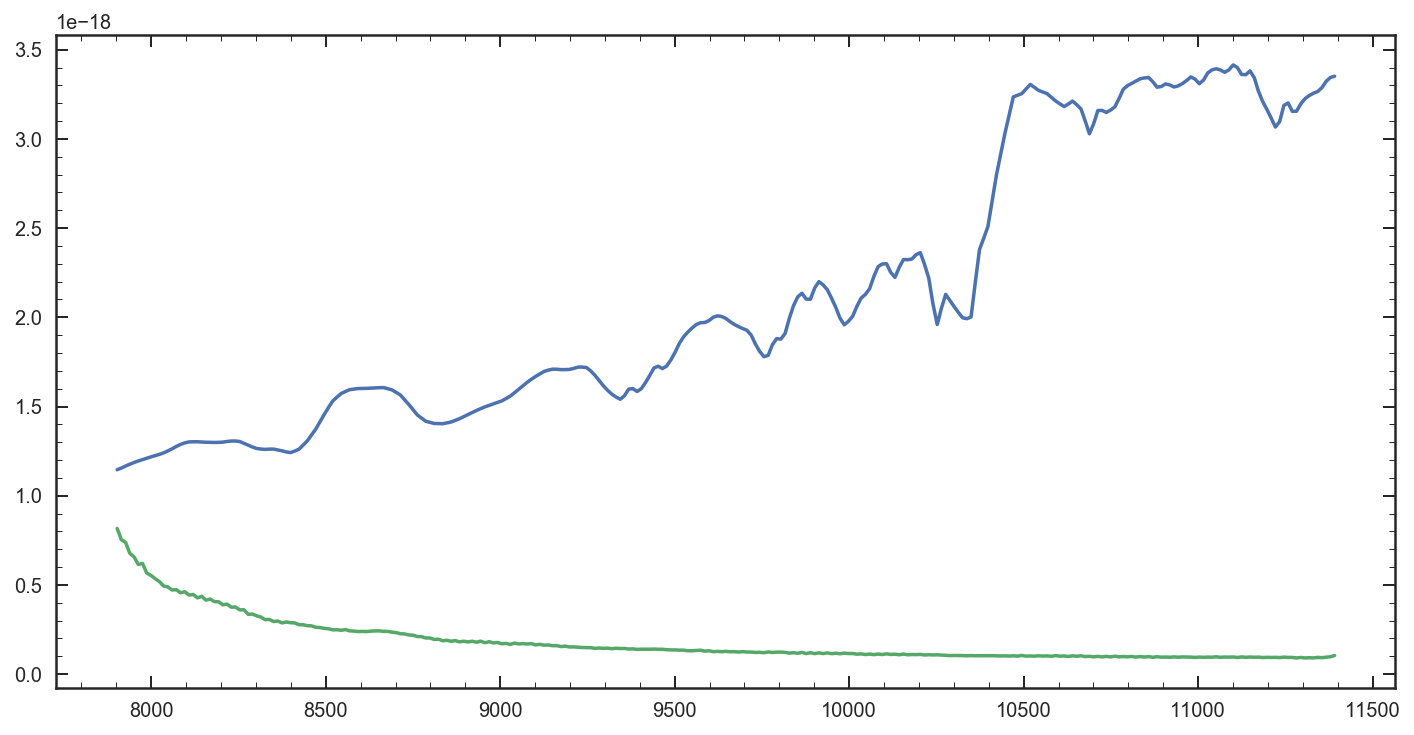

In [8]:
plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl)
plt.plot(spec1.gal_wv,spec1.gal_er)

plt.figure(figsize=[12,6])
plt.plot(spec2.gal_wv,spec2.fl)
plt.plot(spec2.gal_wv,spec2.gal_er)

plt.figure(figsize=[12,6])
plt.plot(spec3.gal_wv,spec3.fl)
plt.plot(spec3.gal_wv,spec3.gal_er)

plt.figure(figsize=[12,6])
plt.plot(spec4.gal_wv,spec4.fl)
plt.plot(spec4.gal_wv,spec4.gal_er)

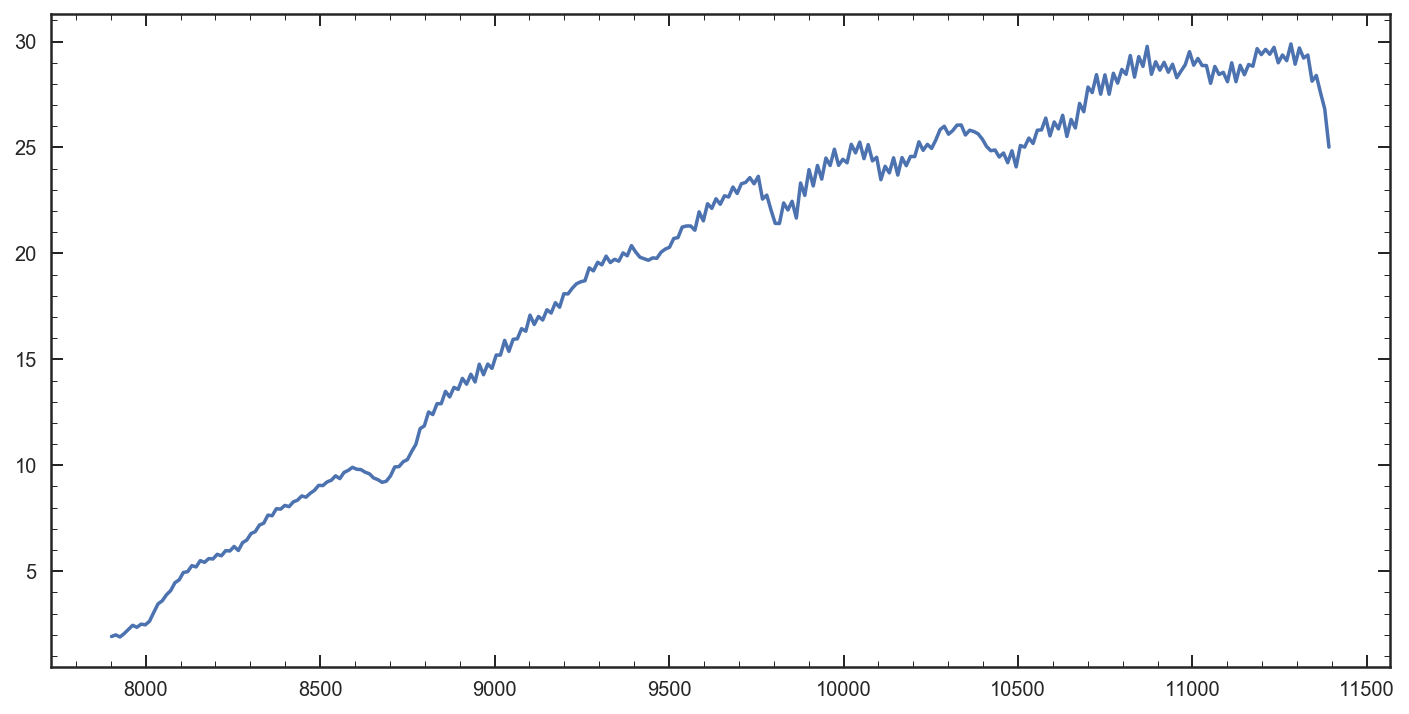

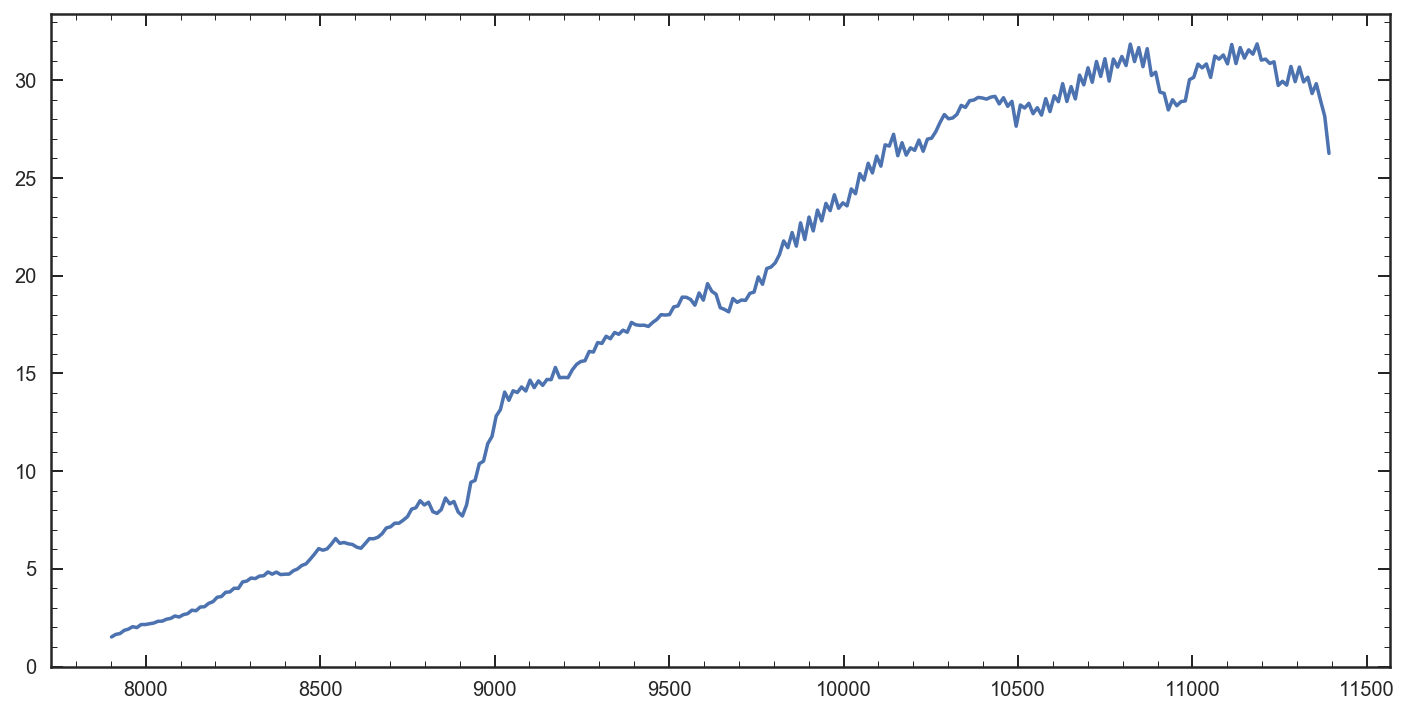

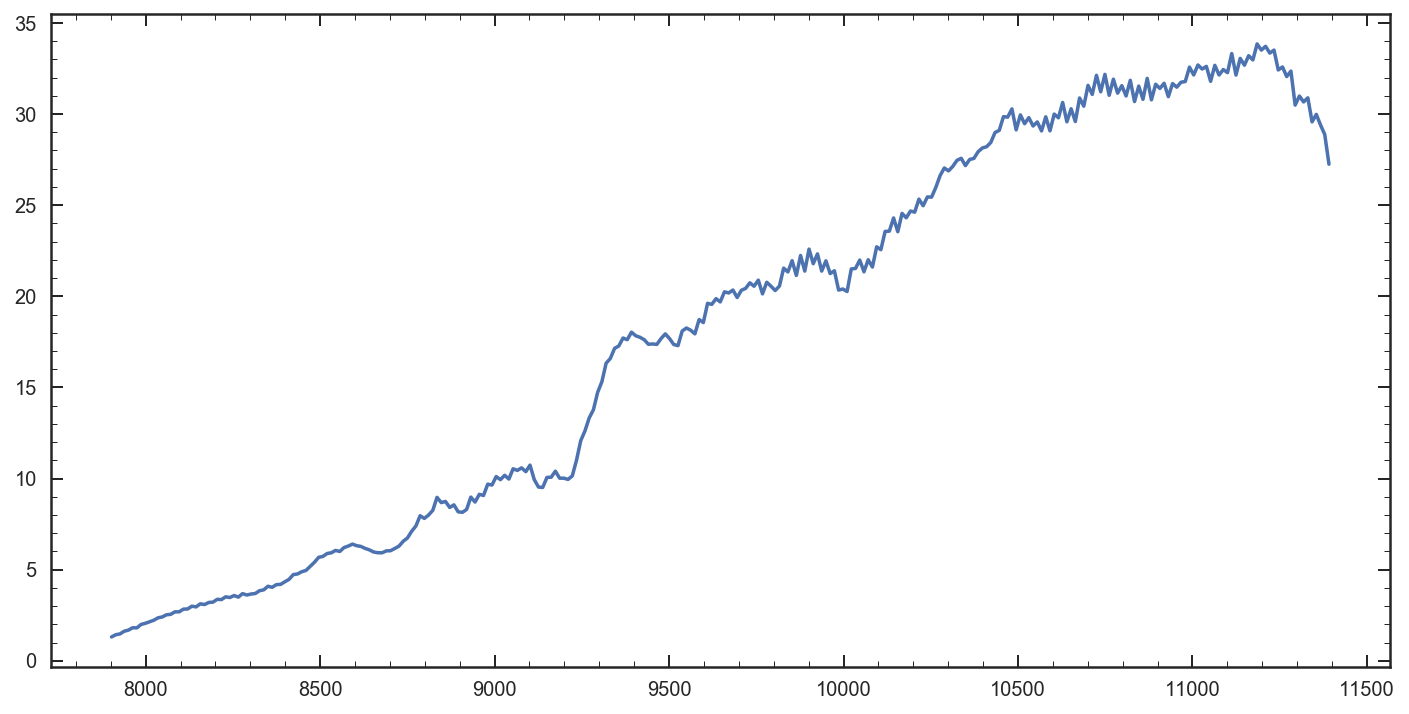

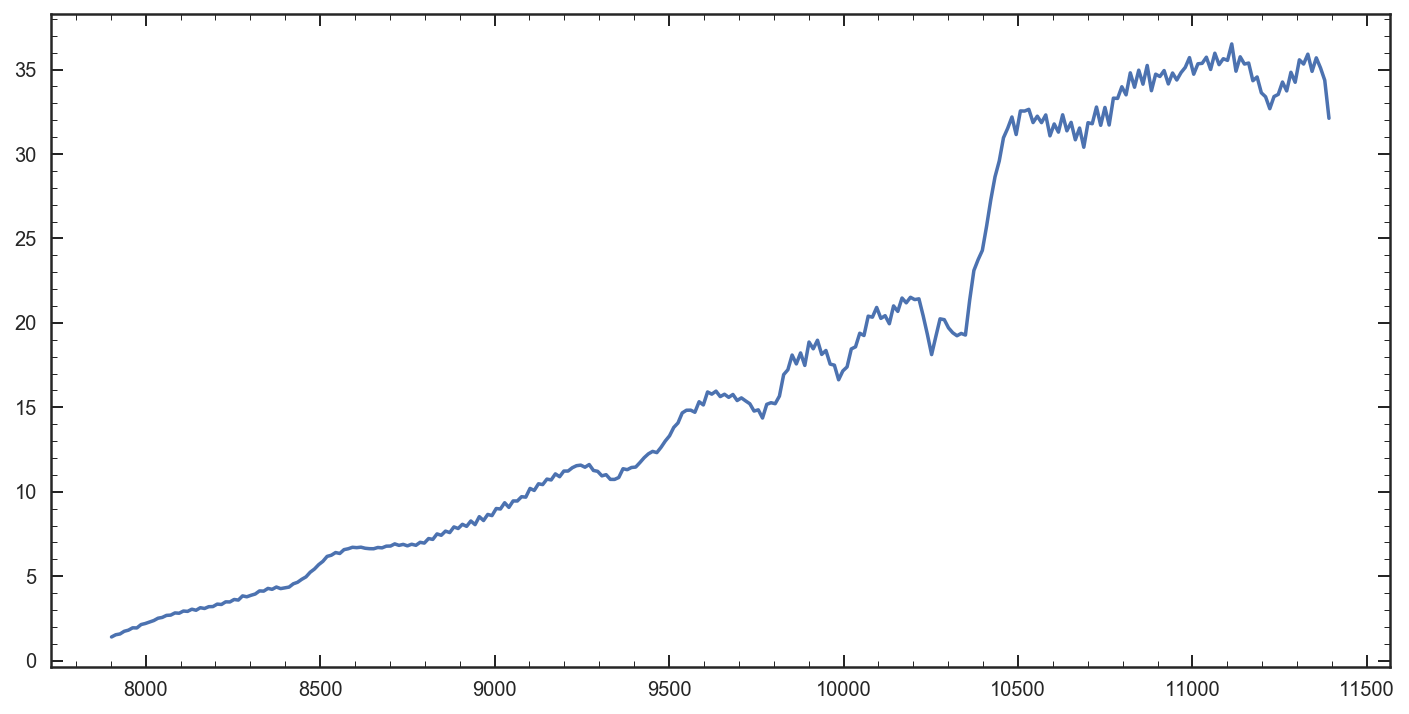

In [11]:
plt.figure(figsize=[12,6])
plt.plot(spec1.gal_wv,spec1.fl/spec1.gal_er)
# plt.plot(spec1.gal_wv,spec1.gal_er)

plt.figure(figsize=[12,6])
plt.plot(spec2.gal_wv,spec2.fl/spec2.gal_er)
# plt.plot(spec2.gal_wv,spec2.gal_er)

plt.figure(figsize=[12,6])
plt.plot(spec3.gal_wv,spec3.fl/spec3.gal_er)
# plt.plot(spec3.gal_wv,spec3.gal_er)

plt.figure(figsize=[12,6])
plt.plot(spec4.gal_wv,spec4.fl/spec4.gal_er)
# plt.plot(spec4.gal_wv,spec4.gal_er)